# Springboard Capstone 02 - Energy price prediction based on weather
## Data Wrangling

# Table of Contents<a id='Table_of_Contents'></a>
* [1.0 Energy Data Set](#1.0_energy_data_set)
  * [1.1 Import and inspect data](#1.1_Import_and_inspect_data)
    * [1.1.1 Checking datatypes](#1.1.1_Checking_datatypes)
    * [1.1.2 Convert time to datetime because parsing didn't work](#1.1.2_Convert_time_to_datetime)
    * [1.1.3 Create y-data profile report](#1.1.3_Create_y-data_profile_report)
    * [1.1.4 Set datetime as index](#1.1.4_Set_datetime_as_index)
  * [1.2 Investigating missing values in energy data](#1.2_Investigating_missing_values_in_energy_data)
    * [1.2.1 Generate information about missing data](#1.2.1_Generate_information_about_missing_data)
    * [1.2.2 Drop columns with too much missing information or only zeros](#1.2.2_Drop_columns)
    * [1.2.3 Investigate if total load actual is the sum of the generation columns](#1.2.3_Investigate_total_load)
    * [1.2.4 Impute data to fill in NaNs](#1.2.4_Impute_data)
  * [1.3 Summarizing and adding features](#1.3_Summarizing_adding)
    * [1.3.1 Implement total generation and difference calculations for entire dataframe](#1.3.1_Implement_total_generation)
    * [1.3.2 Summarize generation data using max](#1.3.2_Summarize_generation)
    * [1.3.3 Add month and day of week columns](#1.3.3_Add_month_and_day_of_week)
* [2.0 Weather Data Set](#2.0_Weather_Data_Set)
  * [2.1 Import and inspect data](#2.1_Import_and_inspect_data)
    * [2.1.1 Check to see the relationship between temp, temp_min, and temp_max](#2.1.1_Check_relationship_temp)
    * [2.1.2 Create y-data report](#2.1.2_Create_y-data_report)
    * [2.1.3 Check to see if the energy_data and weather_data have the same number of rows](#2.1.3_Check_num_rows)
  * [2.2 Investigate missing values in weather data](#2.2_Investigate_missing_values)
  * [2.3 Investigate categorical features](#2.3_Investigate_categorical_features)
  * [2.4 Summarizing the data](#2.4_Summarizing_the_data)
* [3.0 Joining the data sets](#3.0_Joining)

In [1]:
#Import libraries
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
from datetime import datetime
from dateutil import tz
from pytz import timezone
import missingno as msno

# 1.0 Energy Data Set<a id='1.0_energy_data_set'></a>

## 1.1 Import and inspect data<a id='1.1_Import_and_inspect_data'></a> 

In [2]:
energy_data = pd.read_csv('raw_data/energy_dataset.csv', parse_dates=['time'])

In [3]:
energy_data.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04


### 1.1.1 Checking datatypes<a id='1.1.1_Checking_datatypes'></a>

In [4]:
energy_data.dtypes

time                                            object
generation biomass                             float64
generation fossil brown coal/lignite           float64
generation fossil coal-derived gas             float64
generation fossil gas                          float64
generation fossil hard coal                    float64
generation fossil oil                          float64
generation fossil oil shale                    float64
generation fossil peat                         float64
generation geothermal                          float64
generation hydro pumped storage aggregated     float64
generation hydro pumped storage consumption    float64
generation hydro run-of-river and poundage     float64
generation hydro water reservoir               float64
generation marine                              float64
generation nuclear                             float64
generation other                               float64
generation other renewable                     float64
generation

### 1.1.2 Convert time to DateTime because parsing did not work<a id='1.1.2_Convert_time_to_datetime'></a>

In [5]:
#Need to use to_datetime to convert time to datetime, and have to set utc=True because there is DST and it won't work otherwise, however, after conversion, the times are now in UTC instead of local time.
energy_data['time'] = pd.to_datetime(energy_data['time'], utc=True)

In [6]:
#Convert to Madrid timezone
energy_data.time = energy_data.time.dt.tz_convert('Europe/Madrid')

In [7]:
energy_data.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04


In [8]:
#Review summary of data
energy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype                        
---  ------                                       --------------  -----                        
 0   time                                         35064 non-null  datetime64[ns, Europe/Madrid]
 1   generation biomass                           35045 non-null  float64                      
 2   generation fossil brown coal/lignite         35046 non-null  float64                      
 3   generation fossil coal-derived gas           35046 non-null  float64                      
 4   generation fossil gas                        35046 non-null  float64                      
 5   generation fossil hard coal                  35046 non-null  float64                      
 6   generation fossil oil                        35045 non-null  float64                      
 7   generation fossil oil 

### 1.1.3 Create y-data profile report<a id='1.1.3_Create_y-data_profile_report'></a>

In [9]:
#Create y-data profile report
#profile_report = energy_data.profile_report(html={"style": {"full_width": True}})
#profile_report.to_file("Capstone02_ydatareport.html")

### 1.1.4 Set datetime as index<a id='1.1.4_Set_datetime_as_index'></a>

In [10]:
energy_data.set_index('time', inplace=True)

## 1.2 Investigating missing values in energy data<a id='1.2_Investigating_missing_values_in_energy_data'></a>

### 1.2.1 Generate information about missing data<a id='1.2.1_Generate_information_about_missing_data'></a>

In [11]:
#Analyze missing data in energy df
missing_energy = pd.concat([energy_data.isna().sum(), 100 * energy_data.isna().mean()], axis=1)
missing_energy.columns=['count', '%']
missing_energy.sort_values(by='count', ascending=False)

,count,%
generation hydro pumped storage aggregated,35064,100.000000
forecast wind offshore eday ahead,35064,100.000000
total load actual,36,0.102669
generation waste,19,0.054187
generation marine,19,0.054187
generation hydro pumped storage consumption,19,0.054187
generation biomass,19,0.054187
generation fossil oil,19,0.054187
generation hydro run-of-river and poundage,19,0.054187
generation fossil peat,18,0.051335


In [12]:
energy_data[energy_data['total load actual'].isna()]

,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
time,,,,,,,,,,,,,,,,,,,,,
2015-01-05 12:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3932.0,NaN,9258.0,23209.0,NaN,35.50,79.14
2015-01-05 13:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4236.0,NaN,9156.0,23725.0,NaN,36.80,73.95
2015-01-05 14:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4215.0,NaN,9072.0,23614.0,NaN,32.50,71.93
2015-01-05 15:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4050.0,NaN,8779.0,22381.0,NaN,30.00,71.50
2015-01-05 16:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3728.0,NaN,8426.0,21371.0,NaN,30.00,71.85
2015-01-05 17:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3175.0,NaN,7946.0,20760.0,NaN,30.60,80.53
2015-01-28 13:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4136.0,NaN,6223.0,36239.0,NaN,65.00,77.62
2015-02-01 07:00:00+01:00,449.0,312.0,0.0,4765.0,5269.0,222.0,0.0,0.0,0.0,NaN,...,208.0,0.0,3289.0,18.0,NaN,3141.0,24379.0,NaN,56.10,16.98
2015-02-01 08:00:00+01:00,453.0,312.0,0.0,4938.0,5652.0,288.0,0.0,0.0,0.0,NaN,...,207.0,0.0,3102.0,63.0,NaN,3165.0,27389.0,NaN,57.69,19.56


In [13]:
#Get summary statistics for energy df
energy_data.describe().T

,count,mean,std,min,25%,50%,75%,max
generation biomass,35045.0,383.513540,85.353943,0.00,333.0000,367.00,433.00,592.00
generation fossil brown coal/lignite,35046.0,448.059208,354.568590,0.00,0.0000,509.00,757.00,999.00
generation fossil coal-derived gas,35046.0,0.000000,0.000000,0.00,0.0000,0.00,0.00,0.00
generation fossil gas,35046.0,5622.737488,2201.830478,0.00,4126.0000,4969.00,6429.00,20034.00
generation fossil hard coal,35046.0,4256.065742,1961.601013,0.00,2527.0000,4474.00,5838.75,8359.00
generation fossil oil,35045.0,298.319789,52.520673,0.00,263.0000,300.00,330.00,449.00
generation fossil oil shale,35046.0,0.000000,0.000000,0.00,0.0000,0.00,0.00,0.00
generation fossil peat,35046.0,0.000000,0.000000,0.00,0.0000,0.00,0.00,0.00
generation geothermal,35046.0,0.000000,0.000000,0.00,0.0000,0.00,0.00,0.00
generation hydro pumped storage aggregated,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are two columns without any data: <b>generation hydro pumped storage aggregated</b> and <b>forcast wind offshore eday ahead</b>.
In addition, there are several columns that only have zeros for entries: <ul>
<li>generation fossil coal-derived gas</li>
<li>generation fossil oil shale</li>
<li>generation fossil peat</li>
<li>generation geothermal</li>
<li>generation wind offshore</li>
</ul>
All other columns, except for forcast wind onshore day ahead, total load forecast, total load actual, price day ahead and price actual, have a minimum of 0.0 at some point in the data. 

### 1.2.2 Drop columns with too much missing information or only zeros<a id='1.2.2_Drop_columns'></a>

In [14]:
#Drop columns that have no information
energy_data.drop(columns=['generation hydro pumped storage aggregated', 'forecast wind offshore eday ahead', 'generation fossil coal-derived gas', 
                          'generation fossil oil shale', 'generation fossil peat', 'generation geothermal', 'generation wind offshore'], axis=1, inplace=True)
energy_data.shape

(35064, 21)

In [15]:
energy_data.columns

Index(['generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil gas', 'generation fossil hard coal',
       'generation fossil oil', 'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation marine',
       'generation nuclear', 'generation other', 'generation other renewable',
       'generation solar', 'generation waste', 'generation wind onshore',
       'forecast solar day ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'price actual'],
      dtype='object')

### 1.2.3 Investigate if total load actual is the sum of the generation columns<a id='1.2.3_Investigate_total_load'></a>

In theory total load actual should be the sum of 'all' of the generation columns, so once the other values are imputed, then you should be able to calculate that value.
Check to make sure total load actual is the sum of all generation columns.

In [16]:
#Investigate if total load actual is the sum of the generation columns
#create a df w/o nans
mini_df = energy_data.dropna()
mini_df = energy_data.loc['2015-01-01': '2015-01-31']
print(mini_df.tail())

                           generation biomass  \
time                                            
2015-01-31 19:00:00+01:00               373.0   
2015-01-31 20:00:00+01:00               369.0   
2015-01-31 21:00:00+01:00               369.0   
2015-01-31 22:00:00+01:00               365.0   
2015-01-31 23:00:00+01:00               366.0   

                           generation fossil brown coal/lignite  \
time                                                              
2015-01-31 19:00:00+01:00                                   0.0   
2015-01-31 20:00:00+01:00                                   0.0   
2015-01-31 21:00:00+01:00                                   0.0   
2015-01-31 22:00:00+01:00                                   0.0   
2015-01-31 23:00:00+01:00                                   0.0   

                           generation fossil gas  generation fossil hard coal  \
time                                                                            
2015-01-31 19:00:00+01:0

In [17]:
#get a list of the column names
col_list= list(mini_df)

#get a list of only the columns you want to sum
del col_list[15:]

#Create a gen_total column summing the generation columns
mini_df['gen_total'] = mini_df[col_list].sum(axis=1)

# #Is 'total load actual equal to the sum of the generated loads?
mini_df['total load actual'] == mini_df['gen_total']

# Answer: no
# What is the difference?
mini_df['diff_gen_load'] = mini_df['gen_total'] - mini_df['total load actual'] 
print(mini_df.head())

                           generation biomass  \
time                                            
2015-01-01 00:00:00+01:00               447.0   
2015-01-01 01:00:00+01:00               449.0   
2015-01-01 02:00:00+01:00               448.0   
2015-01-01 03:00:00+01:00               438.0   
2015-01-01 04:00:00+01:00               428.0   

                           generation fossil brown coal/lignite  \
time                                                              
2015-01-01 00:00:00+01:00                                 329.0   
2015-01-01 01:00:00+01:00                                 328.0   
2015-01-01 02:00:00+01:00                                 323.0   
2015-01-01 03:00:00+01:00                                 254.0   
2015-01-01 04:00:00+01:00                                 187.0   

                           generation fossil gas  generation fossil hard coal  \
time                                                                            
2015-01-01 00:00:00+01:0

C:\Users\keral\AppData\Local\Temp\ipykernel_27248\1337670124.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mini_df['gen_total'] = mini_df[col_list].sum(axis=1)
C:\Users\keral\AppData\Local\Temp\ipykernel_27248\1337670124.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mini_df['diff_gen_load'] = mini_df['gen_total'] - mini_df['total load actual']


### It does not appear that the total load actual is the sum of the generations.
It turns out this is correct. "Energy load" is different from "energy generation"; while "generation" refers to the process of creating electricity at a power plant, "load" refers to the amount of electricity being used by appliances or devices, essentially the demand for electricity at a given time, making "load" the consumer side of the energy equation compared to "generation" which is the producer side."(1)

(1) Google search for "energy is load different than generation", Sept 10, 2024 (AI Overview).

### 1.2.4 Impute data to fill in NaNs<a id='1.2.4_Impute_data'></a>

In [18]:
#Imputing linearly will result in floating point decimals, and it appears that the data is in whole numbers. Maybe fillna instead?
energy_data = energy_data.fillna(method='ffill')

C:\Users\keral\AppData\Local\Temp\ipykernel_27248\454429732.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  energy_data = energy_data.fillna(method='ffill')


## 1.3 Summarizing and adding features<a id='1.3_Summarizing_adding'></a>

### 1.3.1 Implement total generation and difference calculations for entire dataframe<a id='1.3.1_Implement_total_generation'></a>

In [19]:
#get a list of the column names (df.columns returns an Index object, when we need a list)
col_list= list(energy_data)
#get a list of only the columns you want so sum
del col_list[15:]
energy_data['gen_total'] = energy_data[col_list].sum(axis=1)
# Calculate the difference between total generation and total load
energy_data['diff_gen_load'] = energy_data['gen_total'] - energy_data['total load actual'] 

In [20]:
#Check to see if there are any negative values in diff_gen_load, as this would indicate times when the demand outpaced the supply.
neg_diff = energy_data[energy_data.diff_gen_load < 0]
print(neg_diff.shape)
perc_neg = (neg_diff.shape[0]/energy_data.shape[0])*100
print(f"The calculated percent of hours when demand outpaced supply is {perc_neg:.2f}%. This seems unlikely.")

(20065, 23)
The calculated percent of hours when demand outpaced supply is 57.22%. This seems unlikely.


### 1.3.2 Summarize generation data using min, avg<a id='1.3.2_Summarize_generation'></a>

In [21]:
print(energy_data.columns)
col_list_e = list(energy_data)
#print(len(col_list))
col_list_e = col_list_e[:-1]
print(col_list_e)
#print(len(col_list))

Index(['generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil gas', 'generation fossil hard coal',
       'generation fossil oil', 'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation marine',
       'generation nuclear', 'generation other', 'generation other renewable',
       'generation solar', 'generation waste', 'generation wind onshore',
       'forecast solar day ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'price actual', 'gen_total', 'diff_gen_load'],
      dtype='object')
['generation biomass', 'generation fossil brown coal/lignite', 'generation fossil gas', 'generation fossil hard coal', 'generation fossil oil', 'generation hydro pumped storage consumption', 'generation hydro run-of-river and poundage', 'generation hydro water reservoir', 'generation marine', 'generati

In [22]:
#create new df to leave energy_data alone
#For now, we are going to operate on all columns except "diff_gen_load", b/c I'm not sure it makes sense to have the max, min or average of that for a particular day.
#In essence, we are abandoning that for now.

eng_grouped = energy_data.drop(columns=['diff_gen_load'])
print(eng_grouped.columns)

Index(['generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil gas', 'generation fossil hard coal',
       'generation fossil oil', 'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation marine',
       'generation nuclear', 'generation other', 'generation other renewable',
       'generation solar', 'generation waste', 'generation wind onshore',
       'forecast solar day ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'price actual', 'gen_total'],
      dtype='object')


In [24]:
#Process new df to add summary statistics
eng_grouped_3 = eng_grouped.groupby(eng_grouped.index.date)[col_list_e].agg(['min', 'max', 'mean'])
#For now, only using 'max'
#eng_grouped_min = eng_grouped.groupby(eng_grouped.index.date)[col_list_e].min()
#eng_grouped_avg = eng_grouped.groupby(eng_grouped.index.date)[col_list_e].mean()

eng_grouped_3 = pd.DataFrame(eng_grouped_3)
#eng_grouped_max = pd.DataFrame(eng_grouped_max)

#If using .agg method, you can skip renaming the columns
#cols = eng_grouped_max.columns
#for i in range(len(col_list)):
#    if col_list[i] in cols:
#        eng_grouped_max.rename(columns={cols[i]: cols[i]+'_daily_max'}, inplace=True)
        
eng_grouped_3.head()

generation biomass                     \
                          min    max        mean   
2015-01-01              401.0  449.0  428.500000   
2015-01-02              353.0  443.0  385.291667   
2015-01-03              393.0  478.0  440.500000   
2015-01-04              350.0  438.0  397.125000   
2015-01-05              334.0  376.0  364.500000   

           generation fossil brown coal/lignite                     \
                                            min    max        mean   
2015-01-01                                172.0  329.0  257.416667   
2015-01-02                                  0.0    0.0    0.000000   
2015-01-03                                  0.0    0.0    0.000000   
2015-01-04                                  0.0    0.0    0.000000   
2015-01-05                                  0.0  326.0   17.916667   

           generation fossil gas                       \
                             min     max         mean   
2015-01-01                3708.0  5196.0  4256.750000   
2015-01-02                2599.0  6082.0  3540.666667   
2015-01-03                2982.0  4157.0  3444.291667   
2015-01-04                3118.0  3997.0  3469.583333   
2015-01-05                3900.0  5699.0  4435.291667   

           generation fossil hard coal  ... total load actual price day ahead  \
                                   min  ...              mean             min   
2015-01-01                      3208.0  ...      23896.750000            32.4   
2015-01-02                      1016.0  ...      27251.291667             4.0   
2015-01-03                      1137.0  ...      25110.666667            11.7   
2015-01-04                      1770.0  ...      27112.625000            14.9   
2015-01-05                      2138.0  ...      23026.833333            30.0   

                             price actual                   gen_total  \
              max       mean          min    max       mean       min   
2015-01-01  62.69  46.702500        48.98  75.64  62.148750   23368.0   
2015-01-02  52.01  16.530833        53.07  83.33  69.327083   29716.0   
2015-01-03  44.00  25.799167        55.29  72.86  65.706667   28366.0   
2015-01-04  40.48  29.873333        46.79  76.49  58.264167   26898.0   
2015-01-05  62.00  38.810833        58.04  90.97  74.568750   22077.0   

                                   
                max          mean  
2015-01-01  28973.0  25901.833333  
2015-01-02  33578.0  31788.041667  
2015-01-03  32058.0  29869.250000  
2015-01-04  32279.0  29645.916667  
2015-01-05  28177.0  26104.916667  

[5 rows x 66 columns]

### 1.3.3 Add month and day of week columns<a id='1.3.3_Add_month_and_day_of_week'></a>

Note: the date (index) is not a datetime obejct, it is a string. Not sure how that affects thing with visualization later. 

In [25]:
#Have to convert index to datetime again.
#Move date out of index to operate on
eng_grouped_3.reset_index(inplace=True, names='date')

#Convert to datetime
eng_grouped_3.date = pd.to_datetime(eng_grouped_3.date, utc=True)

#Add month and day_of_week columns
eng_grouped_3['month'] = eng_grouped_3['date'].dt.strftime('%m')
eng_grouped_3['day_of_week'] = eng_grouped_3['date'].dt.strftime('%A')

#Format date to 'YYYY=mm=dd' - which converts it back to a string
eng_grouped_3['date'] = eng_grouped_3['date'].dt.strftime('%Y-%m-%d')

#Make 'date' index again
eng_grouped_3.set_index('date', inplace=True)

#eng_grouped_3['date'].dtype
eng_grouped_3.head()

generation biomass                     \
                          min    max        mean   
date                                               
2015-01-01              401.0  449.0  428.500000   
2015-01-02              353.0  443.0  385.291667   
2015-01-03              393.0  478.0  440.500000   
2015-01-04              350.0  438.0  397.125000   
2015-01-05              334.0  376.0  364.500000   

           generation fossil brown coal/lignite                     \
                                            min    max        mean   
date                                                                 
2015-01-01                                172.0  329.0  257.416667   
2015-01-02                                  0.0    0.0    0.000000   
2015-01-03                                  0.0    0.0    0.000000   
2015-01-04                                  0.0    0.0    0.000000   
2015-01-05                                  0.0  326.0   17.916667   

           generation fossil gas                       \
                             min     max         mean   
date                                                    
2015-01-01                3708.0  5196.0  4256.750000   
2015-01-02                2599.0  6082.0  3540.666667   
2015-01-03                2982.0  4157.0  3444.291667   
2015-01-04                3118.0  3997.0  3469.583333   
2015-01-05                3900.0  5699.0  4435.291667   

           generation fossil hard coal  ... price day ahead             \
                                   min  ...             max       mean   
date                                    ...                              
2015-01-01                      3208.0  ...           62.69  46.702500   
2015-01-02                      1016.0  ...           52.01  16.530833   
2015-01-03                      1137.0  ...           44.00  25.799167   
2015-01-04                      1770.0  ...           40.48  29.873333   
2015-01-05                      2138.0  ...           62.00  38.810833   

           price actual                   gen_total                         \
                    min    max       mean       min      max          mean   
date                                                                         
2015-01-01        48.98  75.64  62.148750   23368.0  28973.0  25901.833333   
2015-01-02        53.07  83.33  69.327083   29716.0  33578.0  31788.041667   
2015-01-03        55.29  72.86  65.706667   28366.0  32058.0  29869.250000   
2015-01-04        46.79  76.49  58.264167   26898.0  32279.0  29645.916667   
2015-01-05        58.04  90.97  74.568750   22077.0  28177.0  26104.916667   

           month day_of_week  
                              
date                          
2015-01-01    01    Thursday  
2015-01-02    01      Friday  
2015-01-03    01    Saturday  
2015-01-04    01      Sunday  
2015-01-05    01      Monday  

[5 rows x 68 columns]

In [57]:
eng_grouped_3.columns = [' '.join(col).strip() for col in eng_grouped_3.columns.values]
eng_grouped_3.head()

,generation biomass min,generation biomass max,generation biomass mean,generation fossil brown coal/lignite min,generation fossil brown coal/lignite max,generation fossil brown coal/lignite mean,generation fossil gas min,generation fossil gas max,generation fossil gas mean,generation fossil hard coal min,...,price day ahead max,price day ahead mean,price actual min,price actual max,price actual mean,gen_total min,gen_total max,gen_total mean,month,day_of_week
date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,401.0,449.0,428.500000,172.0,329.0,257.416667,3708.0,5196.0,4256.750000,3208.0,...,62.69,46.702500,48.98,75.64,62.148750,23368.0,28973.0,25901.833333,01,Thursday
2015-01-02,353.0,443.0,385.291667,0.0,0.0,0.000000,2599.0,6082.0,3540.666667,1016.0,...,52.01,16.530833,53.07,83.33,69.327083,29716.0,33578.0,31788.041667,01,Friday
2015-01-03,393.0,478.0,440.500000,0.0,0.0,0.000000,2982.0,4157.0,3444.291667,1137.0,...,44.00,25.799167,55.29,72.86,65.706667,28366.0,32058.0,29869.250000,01,Saturday
2015-01-04,350.0,438.0,397.125000,0.0,0.0,0.000000,3118.0,3997.0,3469.583333,1770.0,...,40.48,29.873333,46.79,76.49,58.264167,26898.0,32279.0,29645.916667,01,Sunday
2015-01-05,334.0,376.0,364.500000,0.0,326.0,17.916667,3900.0,5699.0,4435.291667,2138.0,...,62.00,38.810833,58.04,90.97,74.568750,22077.0,28177.0,26104.916667,01,Monday


# 2.0 Weather Data Set<a id='2.0_Weather_Data_Set'></a>

## 2.1 Import and inspect data<a id='2.1_Import_and_inspect_data'></a>

In [26]:
#Load the weather data
weather_data = pd.read_csv('raw_data/weather_features.csv', parse_dates=['dt_iso'])

In [27]:
weather_data['dt_iso'] = pd.to_datetime(weather_data['dt_iso'], utc=True)

In [28]:
#Convert time zone from UTC to Madrid
weather_data.dt_iso = weather_data.dt_iso.dt.tz_convert('Europe/Madrid')

In [29]:
#Review summary of data
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178396 entries, 0 to 178395
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype                        
---  ------               --------------   -----                        
 0   dt_iso               178396 non-null  datetime64[ns, Europe/Madrid]
 1   city_name            178396 non-null  object                       
 2   temp                 178396 non-null  float64                      
 3   temp_min             178396 non-null  float64                      
 4   temp_max             178396 non-null  float64                      
 5   pressure             178396 non-null  int64                        
 6   humidity             178396 non-null  int64                        
 7   wind_speed           178396 non-null  int64                        
 8   wind_deg             178396 non-null  int64                        
 9   rain_1h              178396 non-null  float64                      
 10  rain_3h 

In [30]:
un_cities = weather_data['city_name'].unique()
print(un_cities)
# There is a leading space in "Barcelona"

['Valencia' 'Madrid' 'Bilbao' ' Barcelona' 'Seville']


In [31]:
#Remove leading spaces from "Barcelona"
weather_data['city_name'] = weather_data['city_name'].str.replace(" ", "")
weather_data['city_name'].unique()

array(['Valencia', 'Madrid', 'Bilbao', 'Barcelona', 'Seville'],
      dtype=object)

In [32]:
#Print head of df
weather_data.head()

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2015-01-01 00:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
1,2015-01-01 01:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2,2015-01-01 02:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
3,2015-01-01 03:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
4,2015-01-01 04:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n


### 2.1.1 Check to see the relationship between temp, temp_min, and temp_max<a id='2.1.1_Check_relationship_temp'></a>

In [33]:
#Looking at the first few rows of the weather df, it looks like temp, temp_min and temp_max are all equal. How to test for this throughout the df?
#Check if they are not all equal > return True only if all unequal
weather_data["temp_uneq"] = weather_data.apply(lambda x: x.temp != x.temp_min != x.temp_max, axis = 1)
weather_data['temp_uneq'].sum()
#create a df of just the rows where temp != temp_min != temp_max
temp_not_eq = weather_data[weather_data['temp_uneq'] == True][['dt_iso', 'temp', 'temp_min', 'temp_max', 'temp_uneq']]
#Test to see relationship of temp to temp_min and temp_max
temp_not_eq['avg'] = (temp_not_eq['temp_max'] + temp_not_eq['temp_min'])/2
temp_not_eq.head()

,dt_iso,temp,temp_min,temp_max,temp_uneq,avg
1495,2015-03-04 06:00:00+01:00,287.17,286.15,288.05,True,287.1
1496,2015-03-04 07:00:00+01:00,287.20,286.15,288.05,True,287.1
1497,2015-03-04 08:00:00+01:00,287.19,286.15,288.05,True,287.1
1498,2015-03-04 09:00:00+01:00,286.70,285.15,288.05,True,286.6
1499,2015-03-04 10:00:00+01:00,287.19,286.15,288.05,True,287.1


It appears "temp" is close to the average of the temp_min and temp_max, but not exactly. It is not clear what that value is. 

In [34]:
#Drop temp_uneq, temp_min and temp_max from data frame
weather_data = weather_data.drop(columns=['temp_uneq', 'temp_min', 'temp_max'])

### 2.1.2 Create y-data report<a id='2.1.2_Create_y-data_report'></a>

In [35]:
#Create ydata report for weather data
#profile_report = weather_data.profile_report(html={"style": {"full_width": True}})
#profile_report.to_file("Capstone02_weather_ydatareport.html")

### 2.1.3 Check to see if the energy_data and weather_data have the same number of rows<a id='2.1.3_Check_num_rows'></a>

In [36]:
#Since both data sets have the same start and end dates, and the data is hourly, they should have the same number of rows, but let's check.
energy_data.shape[0] == weather_data.shape[0]

False

In [37]:
#Since they are not the same length, what is the relationship between the two?
ratio = weather_data.shape[0]/energy_data.shape[0]
print(ratio)

5.087725302304357


There are over five times the number of rows in the weather data set than are in the energy data set.

In [38]:
#Set index
weather_data.set_index('dt_iso', inplace=True)

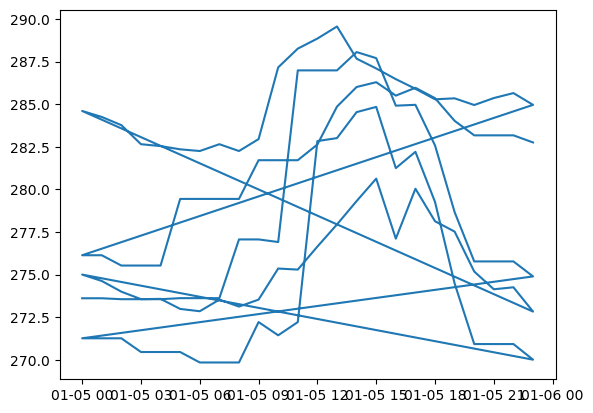

In [39]:
#Examine a particular day
wd_day = weather_data.loc['2015-01-05']
plt.plot(wd_day.index, wd_day['temp'])
plt.show()

There are five times the weather data because there is a data point for each of the five cities.

## 2.2 Investigate missing values in weather data<a id='2.2_Investigate_missing_values'></a>

In [40]:
#Analyze missing data in weather df
missing_weather = pd.concat([weather_data.isnull().sum(), 100 * weather_data.isnull().mean()], axis=1)
missing_weather.columns=['count', '%']
missing_weather.sort_values(by='count', ascending=False)

,count,%
city_name,0,0.0
temp,0,0.0
pressure,0,0.0
humidity,0,0.0
wind_speed,0,0.0
wind_deg,0,0.0
rain_1h,0,0.0
rain_3h,0,0.0
snow_3h,0,0.0
clouds_all,0,0.0


## 2.3 Investigate categorical features<a id='2.3_Investigate_categorical_features'></a>

In [41]:
#Candidates for categorical features are: weather_id, weather_main, weather_description, weather_icon
#Find unique values for each
id_unq = weather_data.weather_id.unique()
main_unq = weather_data.weather_main.unique()
desc_unq = weather_data.weather_description.unique()
icon_unq = weather_data.weather_icon.unique()
print(f"The number of unique weather_id values is {len(id_unq)}.")
print(f"The number of unique weather_main values is {len(main_unq)}.")
print(f"The number of unique weather_description values is {len(desc_unq)}.")
print(f"The number of unique weather_icon values is {len(icon_unq)}.")

The number of unique weather_id values is 38.
The number of unique weather_main values is 12.
The number of unique weather_description values is 43.
The number of unique weather_icon values is 24.


Due to the size of the number of unique values for each of these categories, and the fact that the course has not yet covered natural language processing, these features will be removed from the dataframe.

In [42]:
#Drop the weather_id, weather_main, weather_description, and weather_icon features
weather_data = weather_data.drop(columns = ["weather_id", "weather_main", "weather_description", "weather_icon"])

## 2.4 Summarizing the data<a id='2.4_Summarizing_the_data'></a>

In [45]:
#leave weather_data alone for now
#create a df without wind_deg b/c you don't want to use the "max" of that - not sure if this should be reintegrated in some way later?
wea_grouped_3 = weather_data.drop(columns=['wind_deg'])

In [46]:
print(wea_grouped_3.columns)

Index(['city_name', 'temp', 'pressure', 'humidity', 'wind_speed', 'rain_1h',
       'rain_3h', 'snow_3h', 'clouds_all'],
      dtype='object')


In [47]:
#get a list of the column names you want to summarize (df.columns returns an Index object, when we need a list)
col_list= list(wea_grouped_3)
#get a list of only the columns you want to operate on
col_list.remove("city_name")

print(col_list)

['temp', 'pressure', 'humidity', 'wind_speed', 'rain_1h', 'rain_3h', 'snow_3h', 'clouds_all']


In [49]:
#wea_grouped.dtypes
#wea_grouped_3.index.date
#wea_grouped_3 = wea_grouped_3.groupby([wea_grouped_3.index.date, wea_grouped_3.city_name])[col_list].agg(['min', 'max', np.mean])
wea_grouped_3 = wea_grouped_3.groupby([wea_grouped_3.index.date, wea_grouped_3.city_name])[col_list].agg(['min', 'max', 'mean'])

#ea_grouped = pd.DataFrame(wea_grouped)
# col_list_new_names = [text + '_daily_max' for text in col_list]
# wea_grouped_max.columns = [col_list_new_names]
wea_grouped_3.head(15)

temp                         pressure        \
                             min         max        mean      min   max   
           city_name                                                      
2015-01-01 Barcelona  280.467000  284.602312  282.487945     1035  1038   
           Bilbao     269.203344  284.591687  274.987613     1035  1036   
           Madrid     265.442000  283.308312  272.184819      971  1036   
           Seville    273.375000  286.994000  279.028279     1033  1043   
           Valencia   269.686000  285.277344  275.955570     1001  1035   
2015-01-02 Barcelona  281.452000  286.328688  283.758042     1035  1039   
           Bilbao     270.984344  284.845344  276.188113     1036  1038   
           Madrid     265.902000  284.945344  272.430021      974  1038   
           Seville    275.827000  286.864312  280.372917     1036  1045   
           Valencia   270.277000  287.553688  276.738833     1005  1037   
2015-01-03 Barcelona  282.219000  287.148000  284.539064     1027  1037   
           Bilbao     272.697313  284.809000  276.527997     1035  1037   
           Madrid     267.069000  285.737000  273.765677      974  1036   
           Seville    275.319000  287.973000  280.212572     1037  1045   
           Valencia   271.967000  290.323000  279.044010     1003  1032   

                                  humidity                 wind_speed  ...  \
                             mean      min  max       mean        min  ...   
           city_name                                                   ...   
2015-01-01 Barcelona  1036.583333       57  100  90.458333          2  ...   
           Bilbao     1035.666667       48   97  82.291667          0  ...   
           Madrid      988.333333       45   75  62.541667          0  ...   
           Seville    1039.375000       53   84  71.916667          1  ...   
           Valencia   1010.000000       50   84  69.750000          0  ...   
2015-01-02 Barcelona  1037.541667       50  100  91.791667          1  ...   
           Bilbao     1037.416667       52   95  83.000000          0  ...   
           Madrid      990.875000       46   79  63.875000          1  ...   
           Seville    1042.541667       70   89  82.625000          2  ...   
           Valencia   1013.833333       37   82  67.875000          1  ...   
2015-01-03 Barcelona  1034.375000       35  100  87.916667          1  ...   
           Bilbao     1036.166667       53   97  83.625000          0  ...   
           Madrid      982.541667       59   86  66.875000          0  ...   
           Seville    1043.250000       70   90  84.541667          1  ...   
           Valencia   1007.375000       51   80  70.000000          1  ...   

                     rain_1h rain_3h           snow_3h           clouds_all  \
                        mean     min  max mean     min  max mean        min   
           city_name                                                          
2015-01-01 Barcelona     0.0     0.0  0.0  0.0     0.0  0.0  0.0          0   
           Bilbao        0.0     0.0  0.0  0.0     0.0  0.0  0.0          0   
           Madrid        0.0     0.0  0.0  0.0     0.0  0.0  0.0          0   
           Seville       0.0     0.0  0.0  0.0     0.0  0.0  0.0          0   
           Valencia      0.0     0.0  0.0  0.0     0.0  0.0  0.0          0   
2015-01-02 Barcelona     0.0     0.0  0.0  0.0     0.0  0.0  0.0          0   
           Bilbao        0.0     0.0  0.0  0.0     0.0  0.0  0.0          0   
           Madrid        0.0     0.0  0.0  0.0     0.0  0.0  0.0          0   
           Seville       0.0     0.0  0.0  0.0     0.0  0.0  0.0          0   
           Valencia      0.0     0.0  0.0  0.0     0.0  0.0  0.0          0   
2015-01-03 Barcelona     0.0     0.0  0.0  0.0     0.0  0.0  0.0          0   
           Bilbao        0.0     0.0  0.0  0.0     0.0  0.0  0.0          0   
           Madrid        0.0     0.0  0.0  0.0     0.0  0.0  0.0          0   
        

In [54]:
wea_grouped_3.columns = [' '.join(col).strip() for col in wea_grouped_3.columns.values]
wea_grouped_3.head(15)

temp min    temp max   temp mean  pressure min  \
date       city_name                                                     
2015-01-01 Barcelona  280.467000  284.602312  282.487945          1035   
           Bilbao     269.203344  284.591687  274.987613          1035   
           Madrid     265.442000  283.308312  272.184819           971   
           Seville    273.375000  286.994000  279.028279          1033   
           Valencia   269.686000  285.277344  275.955570          1001   
2015-01-02 Barcelona  281.452000  286.328688  283.758042          1035   
           Bilbao     270.984344  284.845344  276.188113          1036   
           Madrid     265.902000  284.945344  272.430021           974   
           Seville    275.827000  286.864312  280.372917          1036   
           Valencia   270.277000  287.553688  276.738833          1005   
2015-01-03 Barcelona  282.219000  287.148000  284.539064          1027   
           Bilbao     272.697313  284.809000  276.527997          1035   
           Madrid     267.069000  285.737000  273.765677           974   
           Seville    275.319000  287.973000  280.212572          1037   
           Valencia   271.967000  290.323000  279.044010          1003   

                      pressure max  pressure mean  humidity min  humidity max  \
date       city_name                                                            
2015-01-01 Barcelona          1038    1036.583333            57           100   
           Bilbao             1036    1035.666667            48            97   
           Madrid             1036     988.333333            45            75   
           Seville            1043    1039.375000            53            84   
           Valencia           1035    1010.000000            50            84   
2015-01-02 Barcelona          1039    1037.541667            50           100   
           Bilbao             1038    1037.416667            52            95   
           Madrid             1038     990.875000            46            79   
           Seville            1045    1042.541667            70            89   
           Valencia           1037    1013.833333            37            82   
2015-01-03 Barcelona          1037    1034.375000            35           100   
           Bilbao             1037    1036.166667            53            97   
           Madrid             1036     982.541667            59            86   
           Seville            1045    1043.250000            70            90   
           Valencia           1032    1007.375000            51            80   

                      humidity mean  wind_speed min  ...  rain_1h mean  \
date       city_name                                 ...                 
2015-01-01 Barcelona      90.458333               2  ...           0.0   
           Bilbao         82.291667               0  ...           0.0   
           Madrid         62.541667               0  ...           0.0   
           Seville        71.916667               1  ...           0.0   
           Valencia       69.750000               0  ...           0.0   
2015-01-02 Barcelona      91.791667               1  ...           0.0   
           Bilbao         83.000000               0  ...           0.0   
           Madrid         63.875000               1  ...           0.0   
           Seville        82.625000               2  ...           0.0   
           Valencia       67.875000               1  ...           0.0   
2015-01-03 Barcelona      87.916667               1  ...           0.0   
           Bilbao         83.625000               0  ...           0.0   
           Madrid         66.875000               0  ...           0.0   
           Seville        84.541667               1  ...           0.0   
           Valencia       70.000000               1  ...           0.0   

                      rain_3h min  rain_3h max  rain_3h mean  snow_3h min  \
date       city_name                               

In [50]:
#name date index
wea_grouped_3.index.names = ['date', 'city_name']
wea_grouped_3.head(15)

temp                         pressure        \
                             min         max        mean      min   max   
date       city_name                                                      
2015-01-01 Barcelona  280.467000  284.602312  282.487945     1035  1038   
           Bilbao     269.203344  284.591687  274.987613     1035  1036   
           Madrid     265.442000  283.308312  272.184819      971  1036   
           Seville    273.375000  286.994000  279.028279     1033  1043   
           Valencia   269.686000  285.277344  275.955570     1001  1035   
2015-01-02 Barcelona  281.452000  286.328688  283.758042     1035  1039   
           Bilbao     270.984344  284.845344  276.188113     1036  1038   
           Madrid     265.902000  284.945344  272.430021      974  1038   
           Seville    275.827000  286.864312  280.372917     1036  1045   
           Valencia   270.277000  287.553688  276.738833     1005  1037   
2015-01-03 Barcelona  282.219000  287.148000  284.539064     1027  1037   
           Bilbao     272.697313  284.809000  276.527997     1035  1037   
           Madrid     267.069000  285.737000  273.765677      974  1036   
           Seville    275.319000  287.973000  280.212572     1037  1045   
           Valencia   271.967000  290.323000  279.044010     1003  1032   

                                  humidity                 wind_speed  ...  \
                             mean      min  max       mean        min  ...   
date       city_name                                                   ...   
2015-01-01 Barcelona  1036.583333       57  100  90.458333          2  ...   
           Bilbao     1035.666667       48   97  82.291667          0  ...   
           Madrid      988.333333       45   75  62.541667          0  ...   
           Seville    1039.375000       53   84  71.916667          1  ...   
           Valencia   1010.000000       50   84  69.750000          0  ...   
2015-01-02 Barcelona  1037.541667       50  100  91.791667          1  ...   
           Bilbao     1037.416667       52   95  83.000000          0  ...   
           Madrid      990.875000       46   79  63.875000          1  ...   
           Seville    1042.541667       70   89  82.625000          2  ...   
           Valencia   1013.833333       37   82  67.875000          1  ...   
2015-01-03 Barcelona  1034.375000       35  100  87.916667          1  ...   
           Bilbao     1036.166667       53   97  83.625000          0  ...   
           Madrid      982.541667       59   86  66.875000          0  ...   
           Seville    1043.250000       70   90  84.541667          1  ...   
           Valencia   1007.375000       51   80  70.000000          1  ...   

                     rain_1h rain_3h           snow_3h           clouds_all  \
                        mean     min  max mean     min  max mean        min   
date       city_name                                                          
2015-01-01 Barcelona     0.0     0.0  0.0  0.0     0.0  0.0  0.0          0   
           Bilbao        0.0     0.0  0.0  0.0     0.0  0.0  0.0          0   
           Madrid        0.0     0.0  0.0  0.0     0.0  0.0  0.0          0   
           Seville       0.0     0.0  0.0  0.0     0.0  0.0  0.0          0   
           Valencia      0.0     0.0  0.0  0.0     0.0  0.0  0.0          0   
2015-01-02 Barcelona     0.0     0.0  0.0  0.0     0.0  0.0  0.0          0   
           Bilbao        0.0     0.0  0.0  0.0     0.0  0.0  0.0          0   
           Madrid        0.0     0.0  0.0  0.0     0.0  0.0  0.0          0   
           Seville       0.0     0.0  0.0  0.0     0.0  0.0  0.0          0   
           Valencia      0.0     0.0  0.0  0.0     0.0  0.0  0.0          0   
2015-01-03 Barcelona     0.0     0.0  0.0  0.0     0.0  0.0  0.0          0   
           Bilbao        0.0     0.0  0.0  0.0     0.0  0.0  0.0          0   
           Madrid        0.0     0.0  0.0  0.0     0.0  0.0  0.0          0   
        

In [58]:
# save the data to a new csv file
#energy_data.to_csv('data/energy_data.csv')
#weather_data.to_csv('data/weather_data.csv')
eng_grouped_3.to_csv('data/eng_grouped_3.csv')
wea_grouped_3.to_csv('data/wea_grouped_3.csv')

In [59]:
eng_grouped_3.to_pickle('data/eng_grouped_3.pkl')
wea_grouped_3.to_pickle('data/wea_grouped_3.pkl')

# 3.0 Joining the data sets<a id='3.0_Joining'></a>

See "Capstone_02_joining" for joining of the data sets.